<a href="https://colab.research.google.com/github/YesInAJiffy/Python/blob/main/TechnicalAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib/
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib
import talib as ta

--2023-12-29 08:38:24--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-12-29 08:38:24--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://newcontinuum.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-12-29 08:38:24--  http://newcontinuum.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving newco

In [8]:

import pandas as pd
import os
import talib as ta
import yfinance as yf



from pandas_datareader import data as pdr
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [9]:
stocks_array = ["AAPL", "GOOGL", "SPY", "AMZN", "^GSPC", "^NSEI", "TCS.NS"]

In [16]:
# for the defect "TypeError: string indices must be integers, not 'str'"
#yf.pdr_override()

stocks_array = ["AAPL", "GOOGL", "SPY", "AMZN", "^GSPC", "^NSEI", "TCS.NS"]

stock_symbol="GOOGL"

start = '2020-01-24';
end = '2023-10-24'

# for the defect "TypeError: string indices must be integers, not 'str'"
#yfin.pdr_override()

yf.pdr_override()

#stock_data = pdr.DataReader(stock_symbol, "iex", start, end)
#stock_data = pdr.get_data_yahoo(stock_symbol, start, end)
stock_dta = []
for stock_sym in stocks_array:
  stock_dta.append(pdr.get_data_yahoo(stock_sym, start=start))

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


# SIMPLE MOVING AVERAGE
The moving average can be of any number of days. Note: the more the number of days, the smoother the chart shall be.

In [19]:
stk_dta_up = []
for stk in stock_dta :
    stk["SMA_100"] = ta.SMA(stk["Close"],100)
    stk["SMA_200"] = ta.SMA(stk["Close"],200)
    stk["SMA_50"] = ta.SMA(stk["Close"],50)
    #stk_dta_up.append(stk.iloc[200:])
    #print (stk)
stk_dta = stk_dta_up
for stk in stk_dta :
    print (stk)

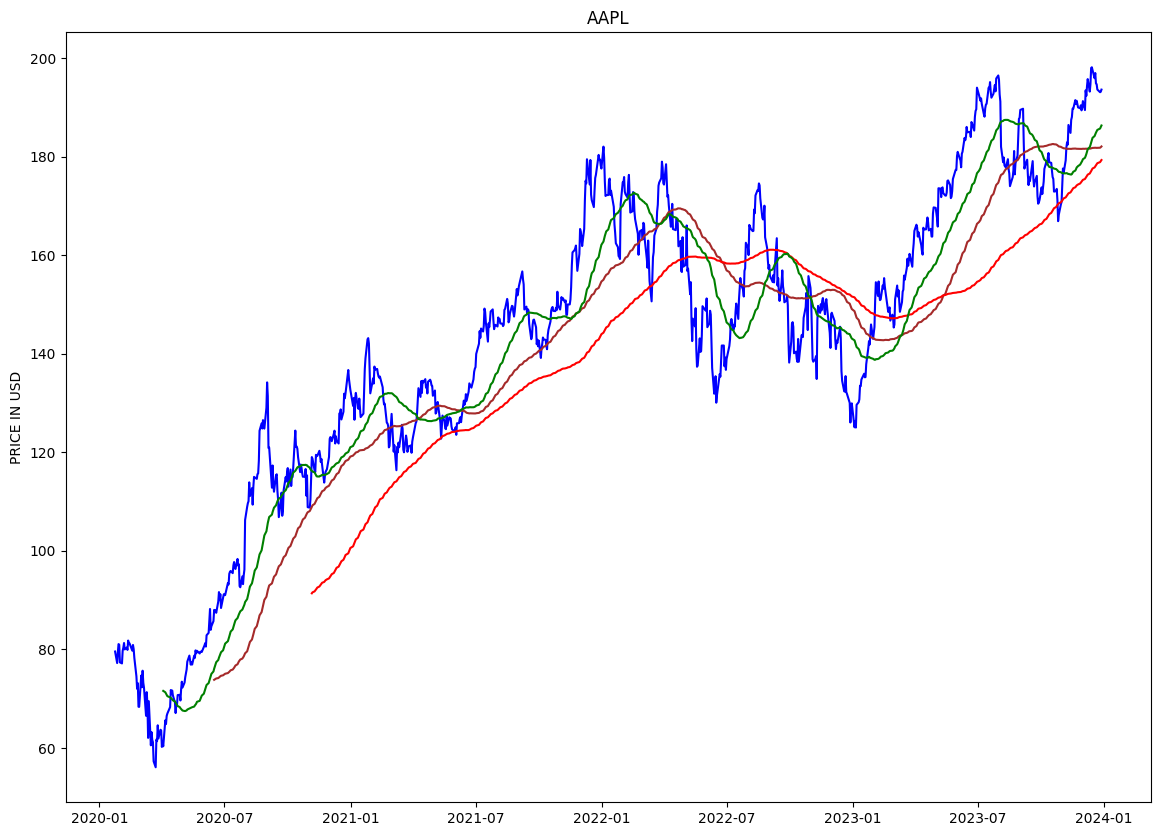

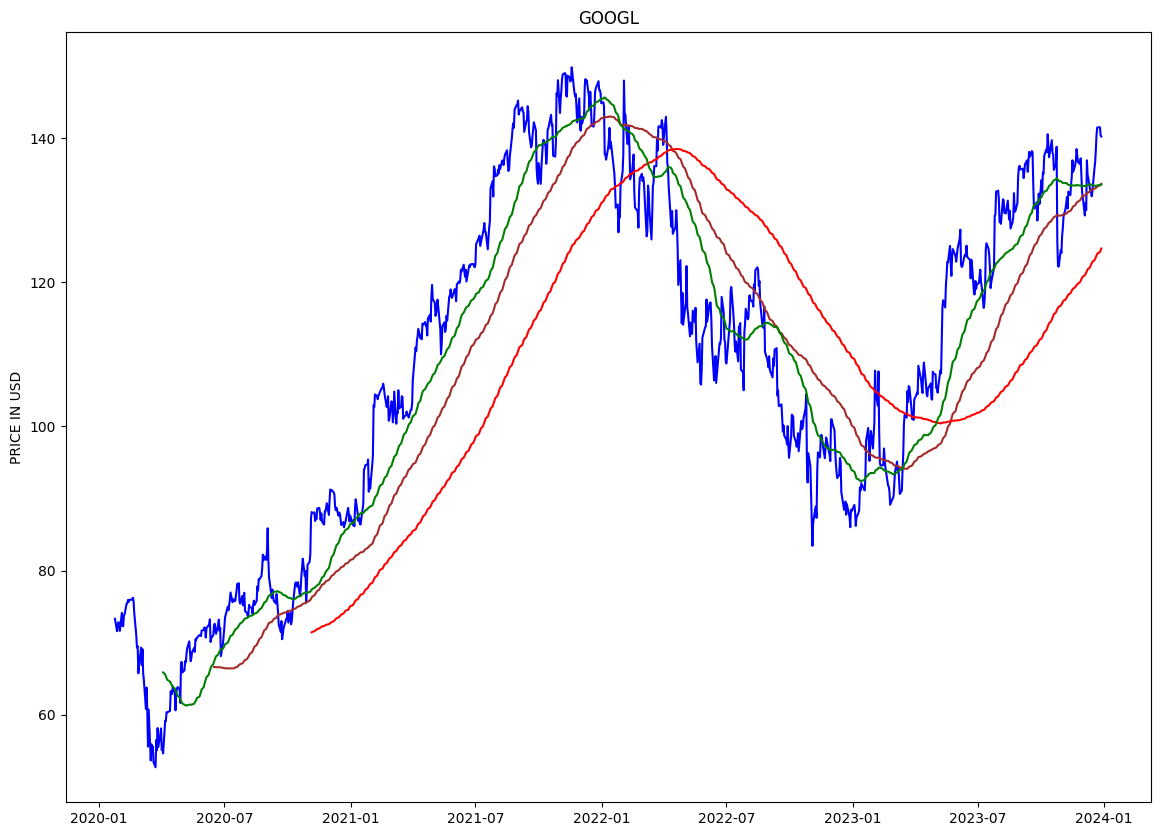

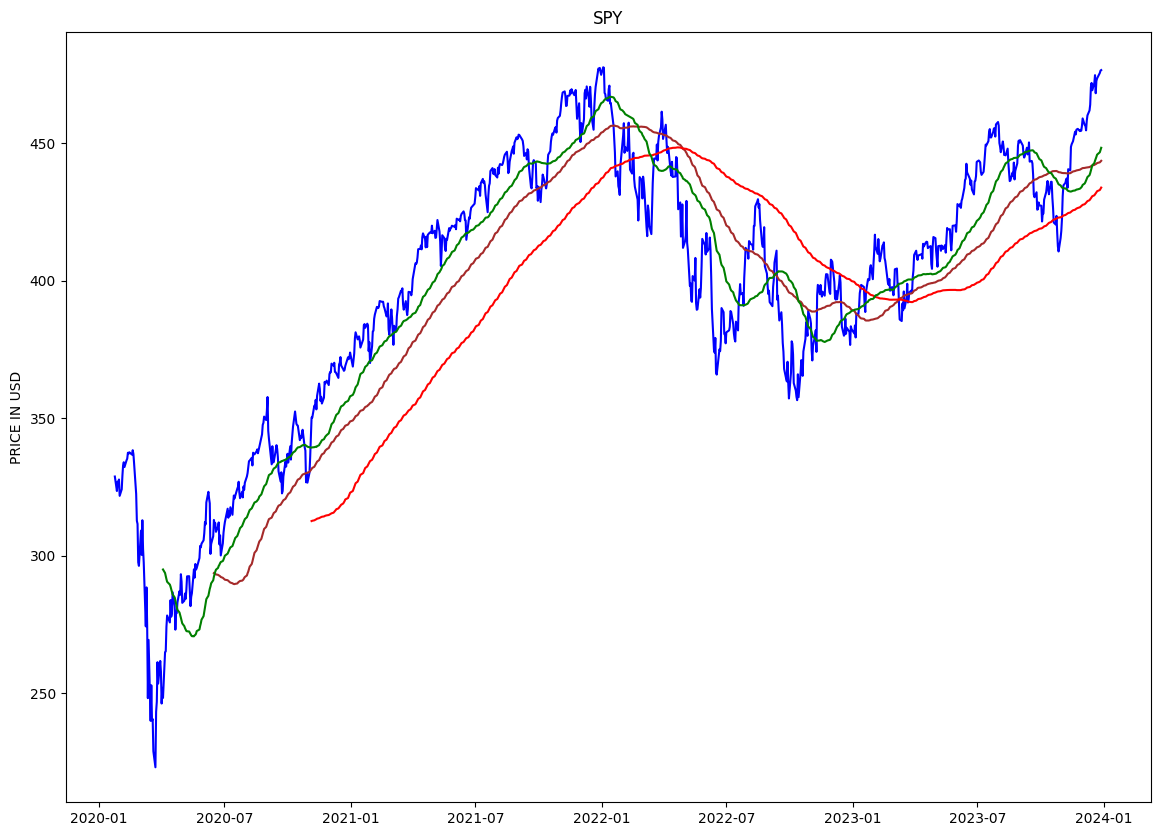

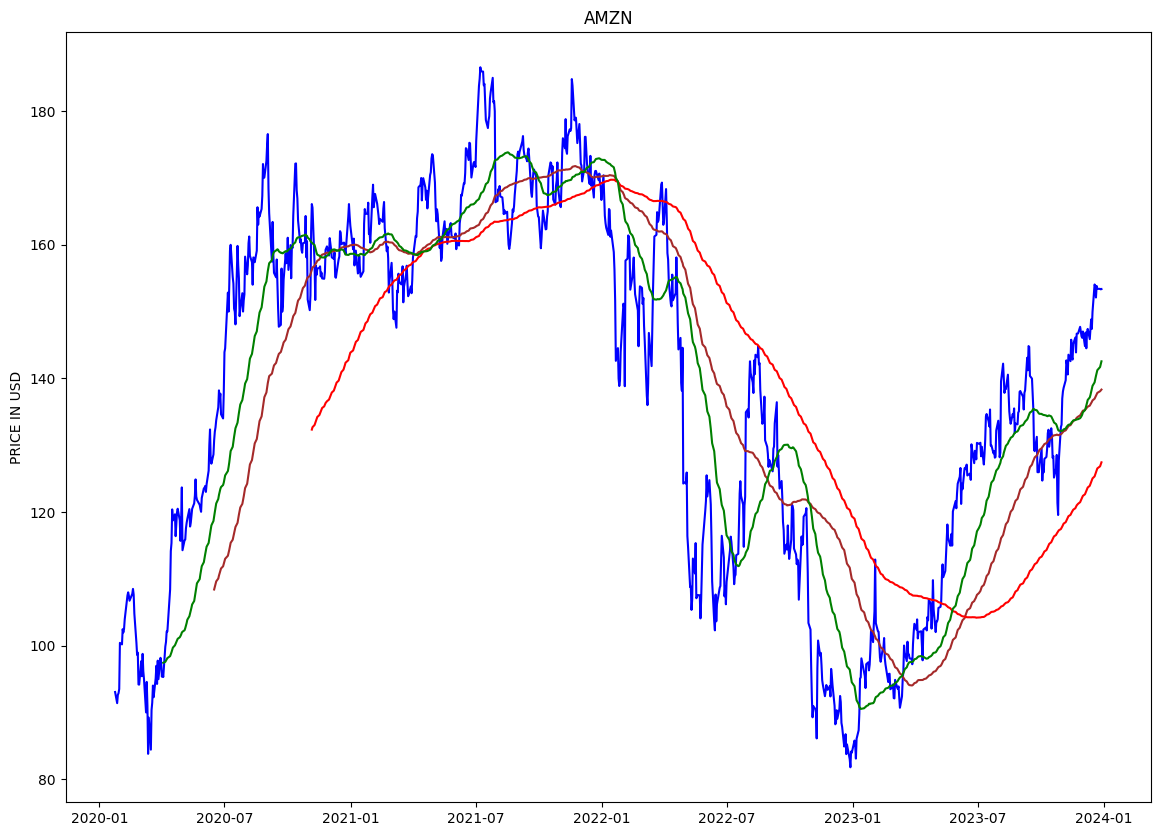

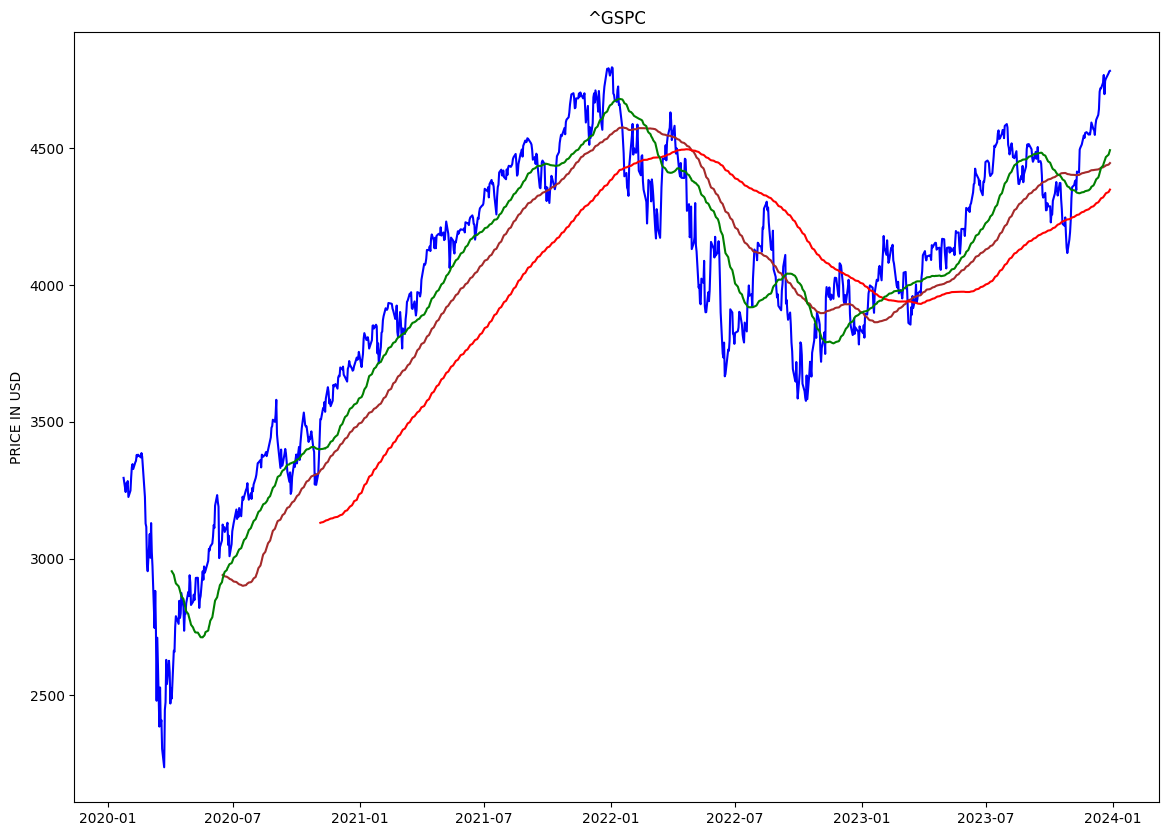

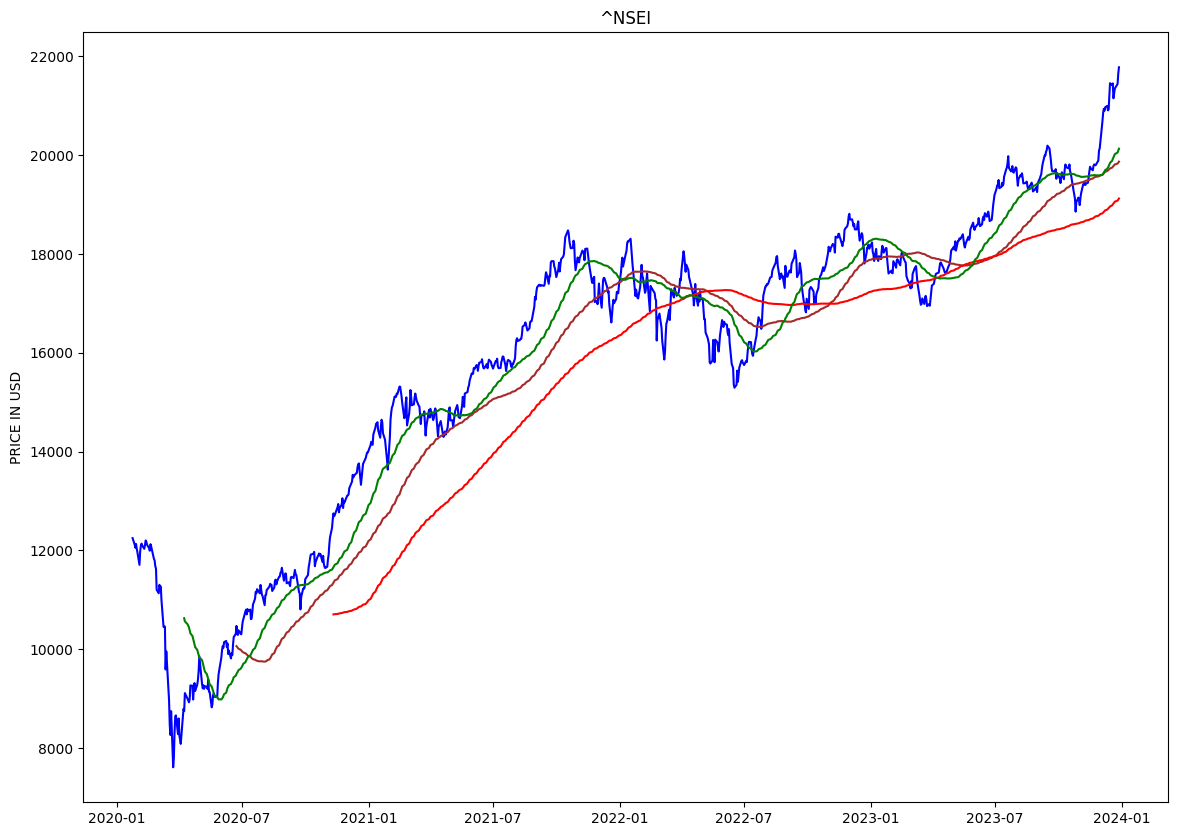

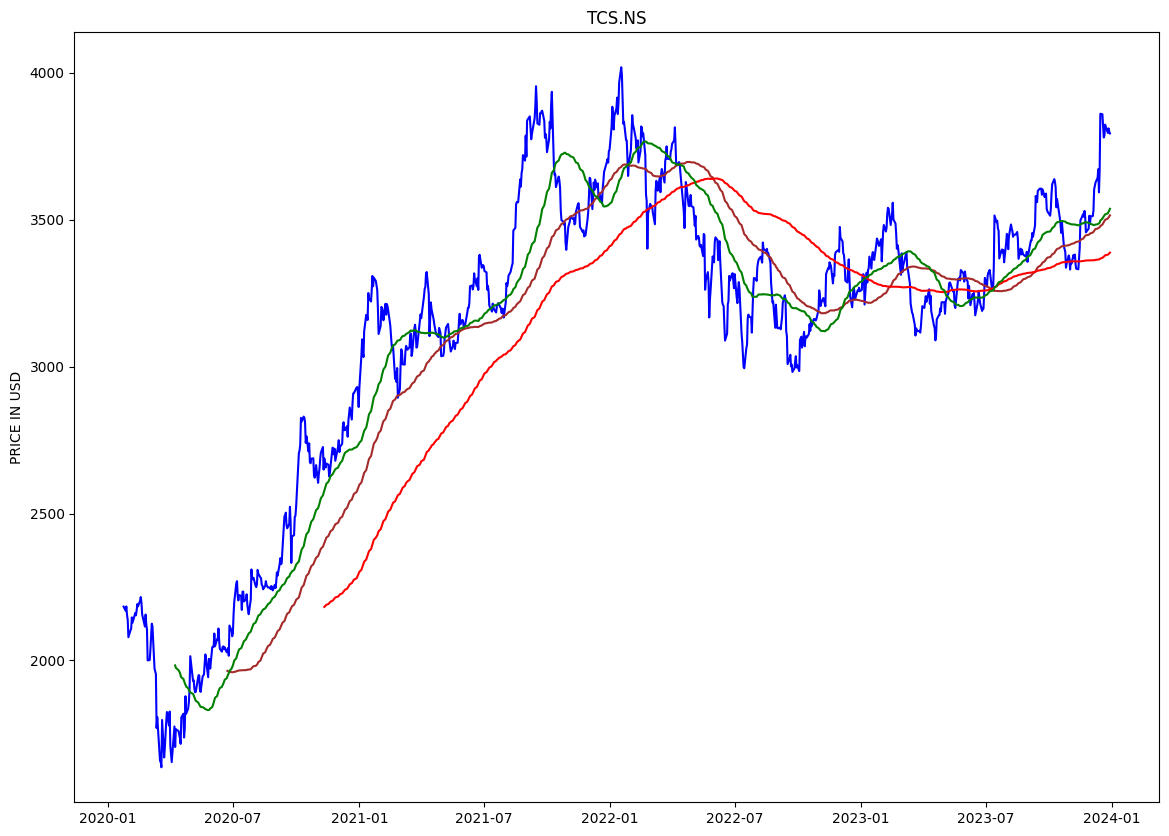

In [20]:
for stk, stk_symbol in zip(stock_dta, stocks_array) :
    plt.figure().set_size_inches(14, 10)
    plt.plot(stk["Close"], color="blue", label="Asdf")
    plt.plot(stk["SMA_100"], color ="brown", label="asdf")
    plt.plot(stk["SMA_200"], color ="red", label="Asdf")
    plt.plot(stk["SMA_50"], color ="green", label="Asdf")
    plt.title(stk_symbol)
    plt.ylabel('PRICE IN USD')
    plt.show()


# RSI (Relative Strength Index)

<Figure size 1400x1000 with 0 Axes>

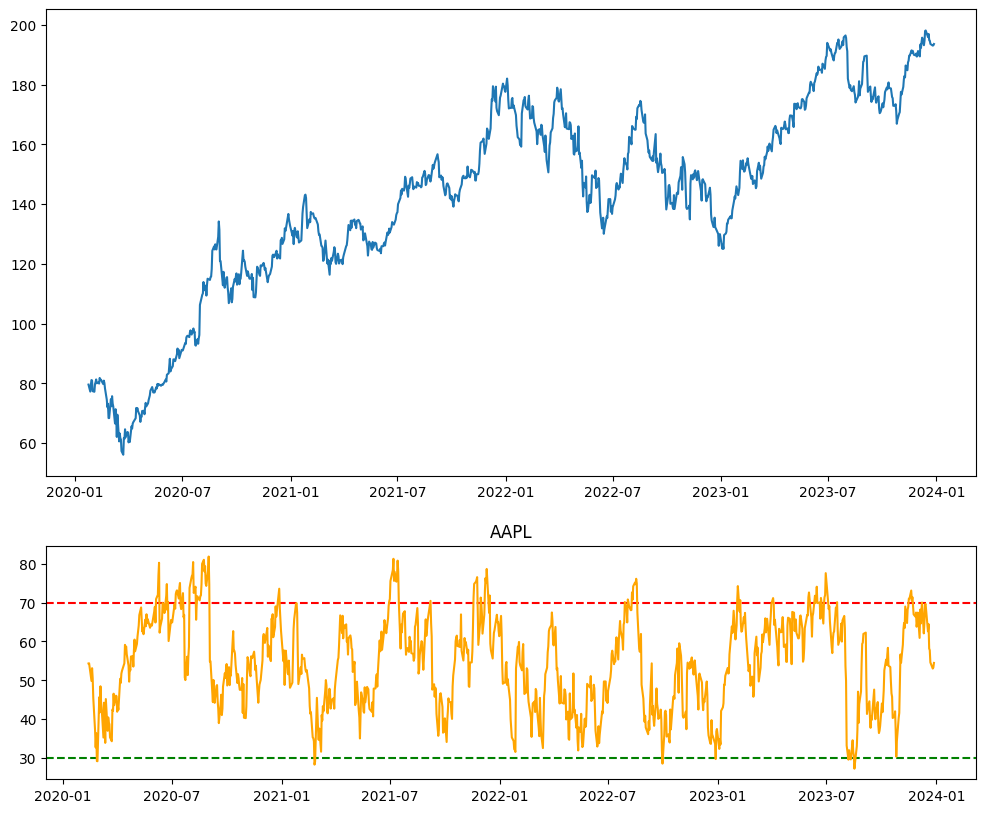

<Figure size 1400x1000 with 0 Axes>

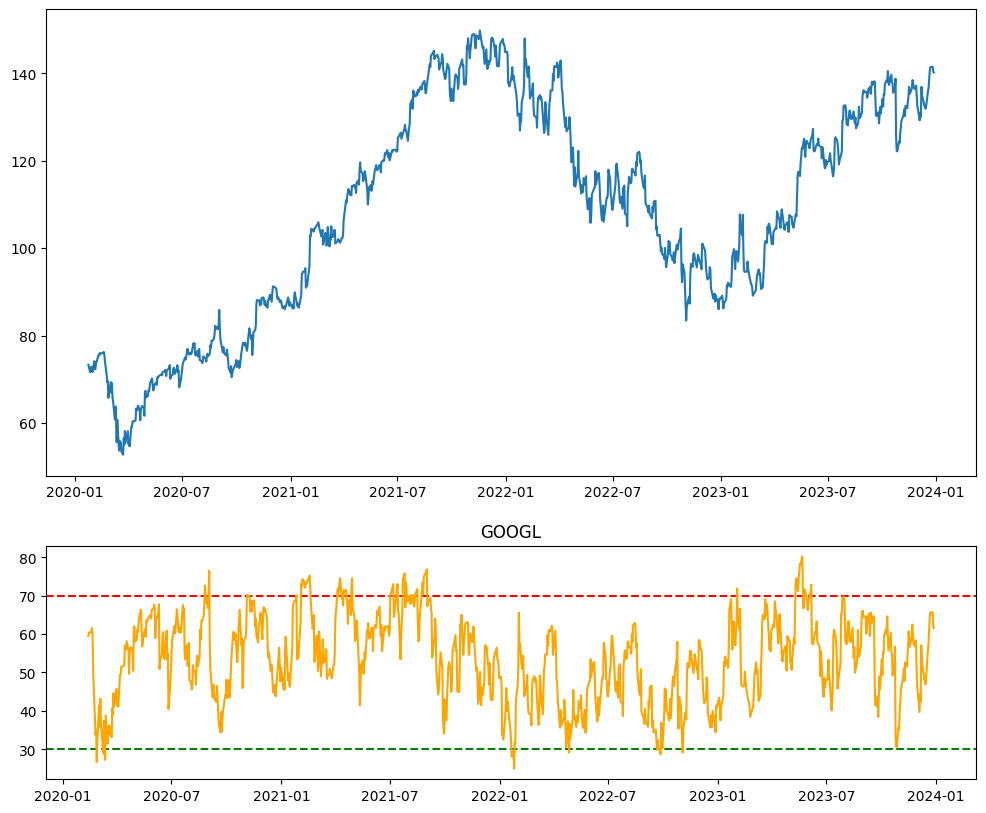

<Figure size 1400x1000 with 0 Axes>

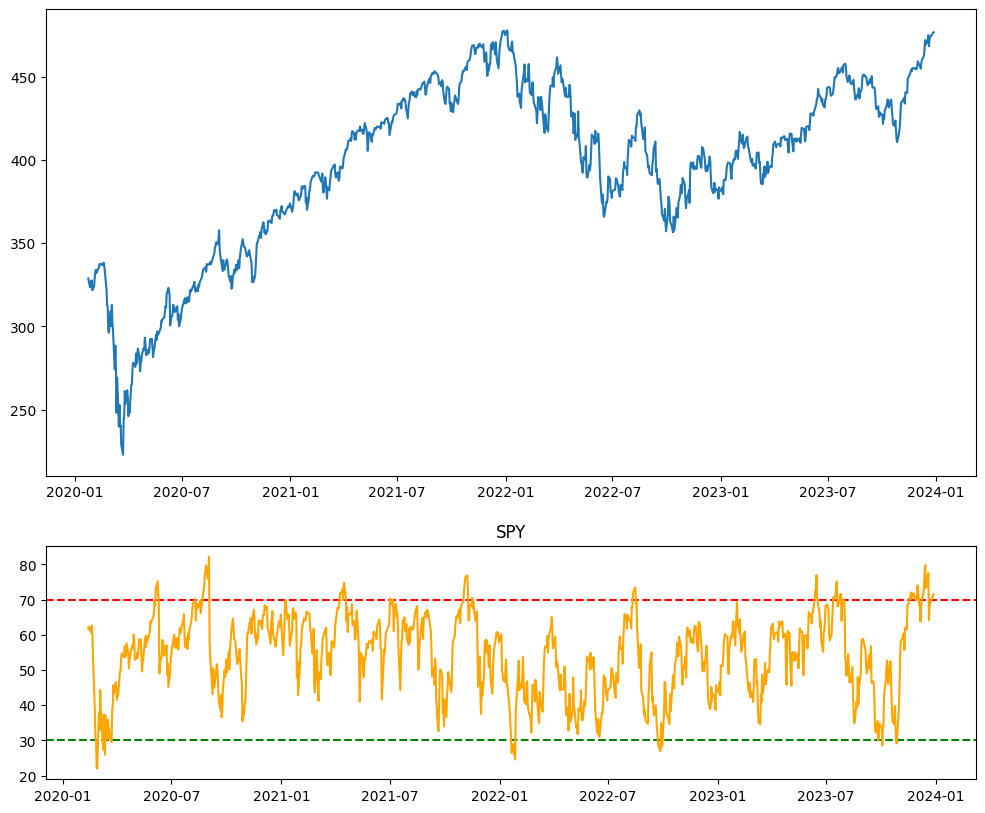

<Figure size 1400x1000 with 0 Axes>

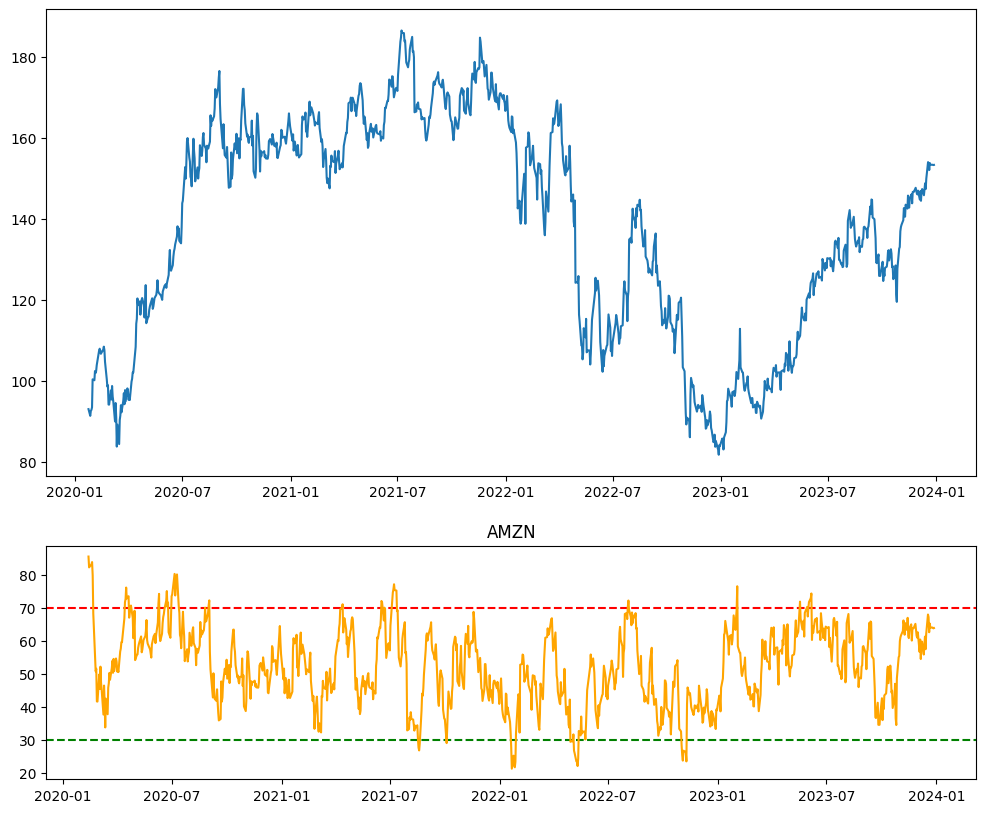

<Figure size 1400x1000 with 0 Axes>

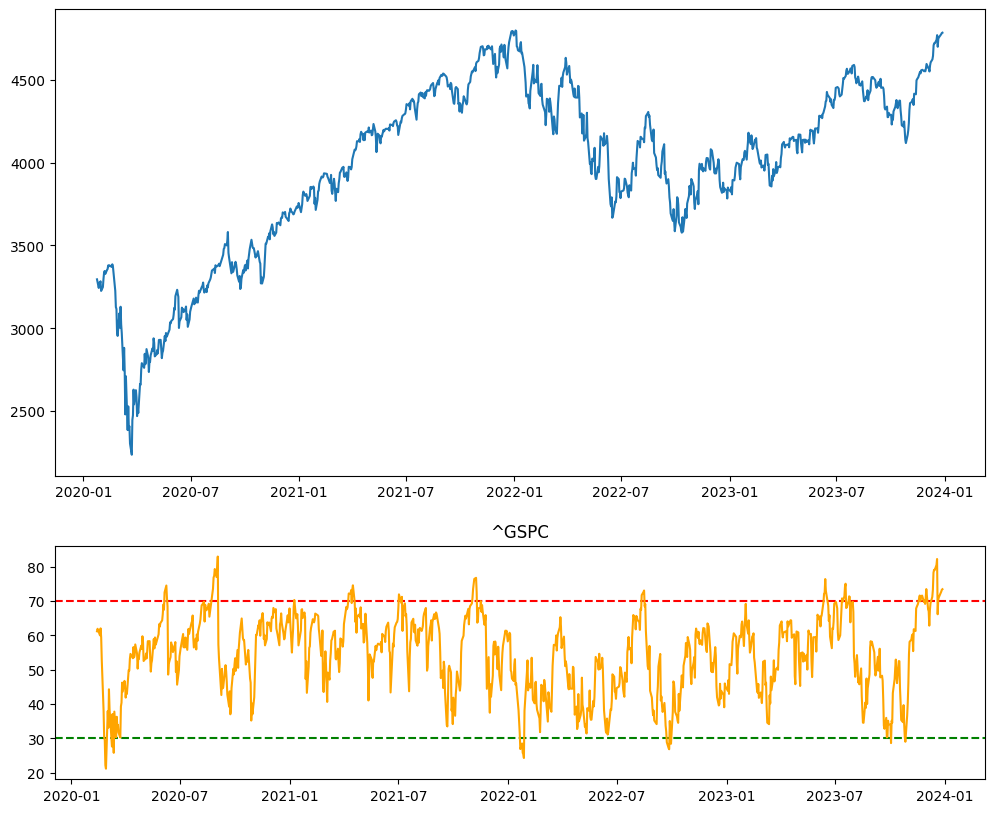

<Figure size 1400x1000 with 0 Axes>

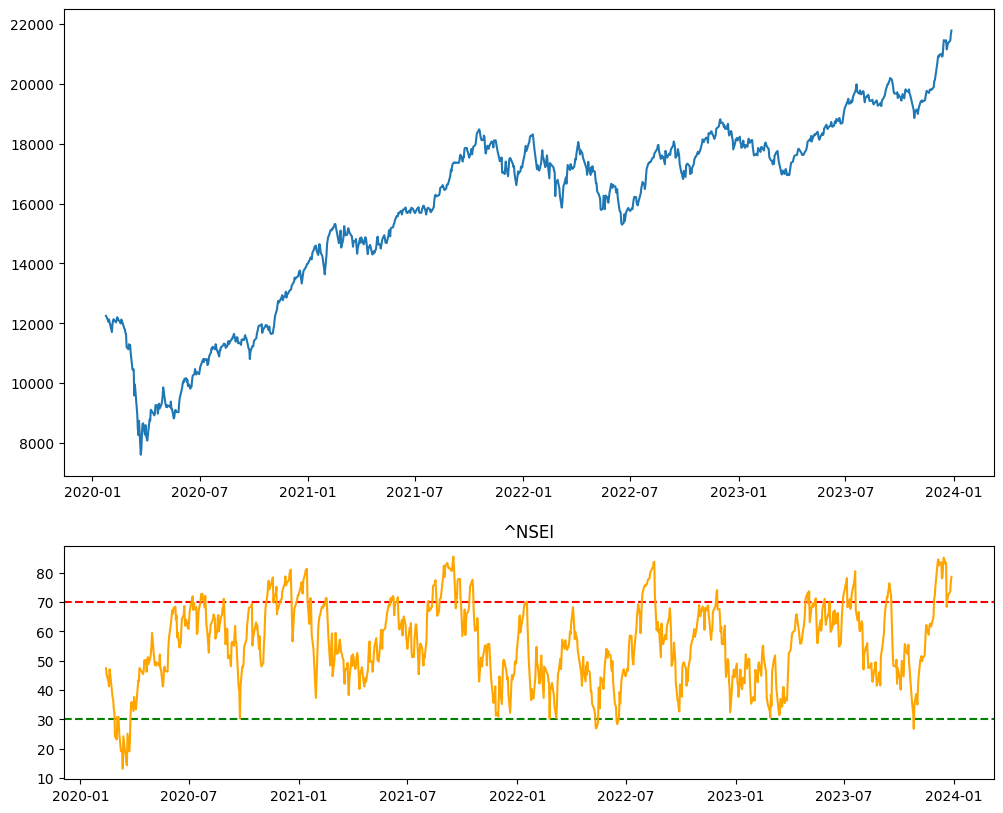

<Figure size 1400x1000 with 0 Axes>

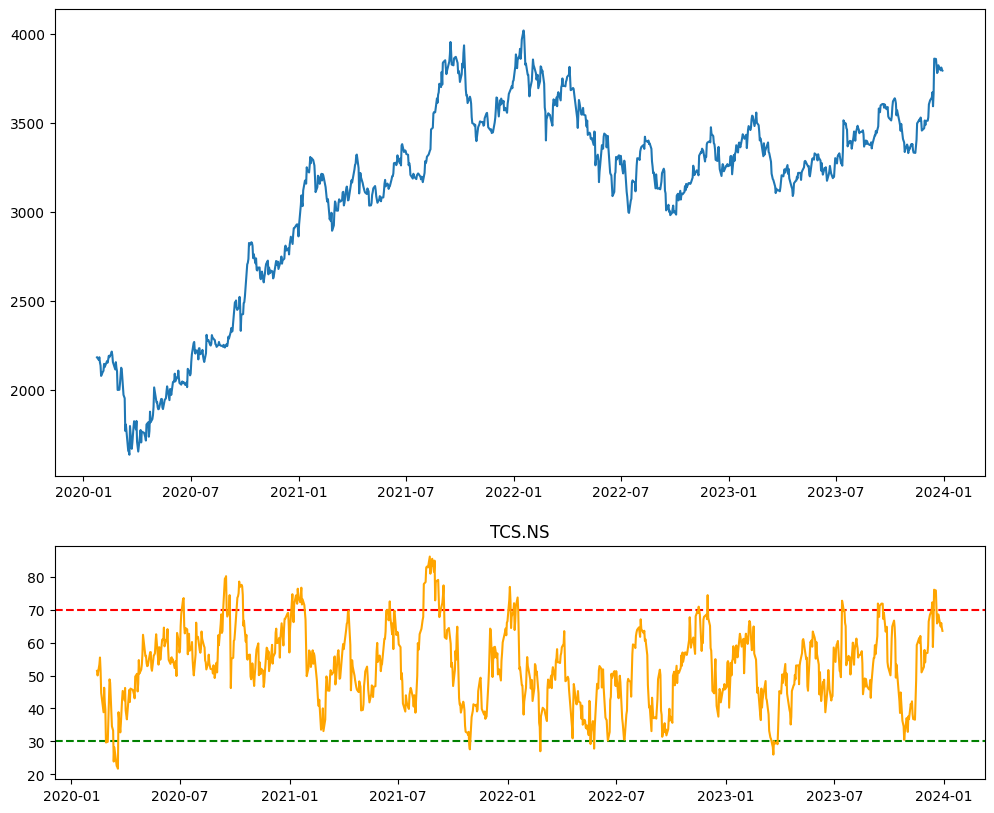

In [21]:
for stk in stock_dta :
    stk["RSI"] = ta.RSI(stk["Close"])


for stk, stk_symbol in zip(stock_dta, stocks_array) :
    plt.figure().set_size_inches(14, 10)

    fig, axs = plt.subplots(2, 1, gridspec_kw={'height_ratios': [2, 1]}, figsize=(12, 10))

    axs[0].plot(stk["Close"])

    axs[1].axhline(y=70, color="r", linestyle="--")
    axs[1].axhline(y=30, color="g", linestyle="--")
    axs[1].plot(stk["RSI"],color="orange")
    plt.title(stk_symbol)



# MACD

<Figure size 1400x1000 with 0 Axes>

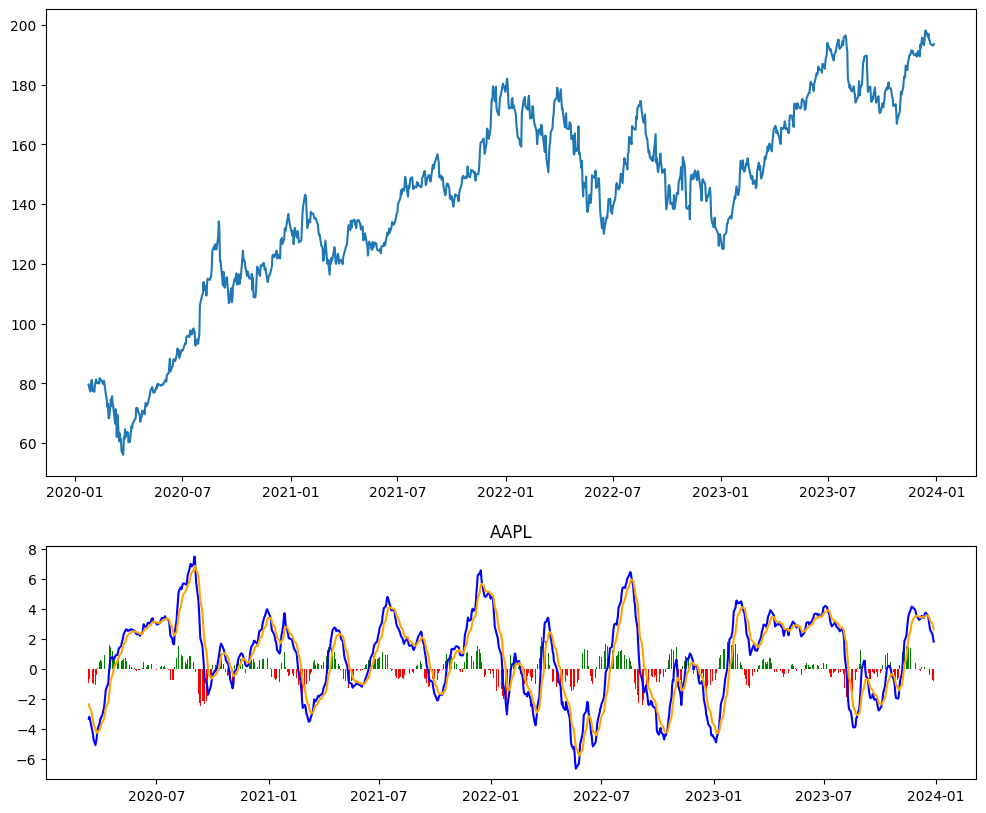

<Figure size 1400x1000 with 0 Axes>

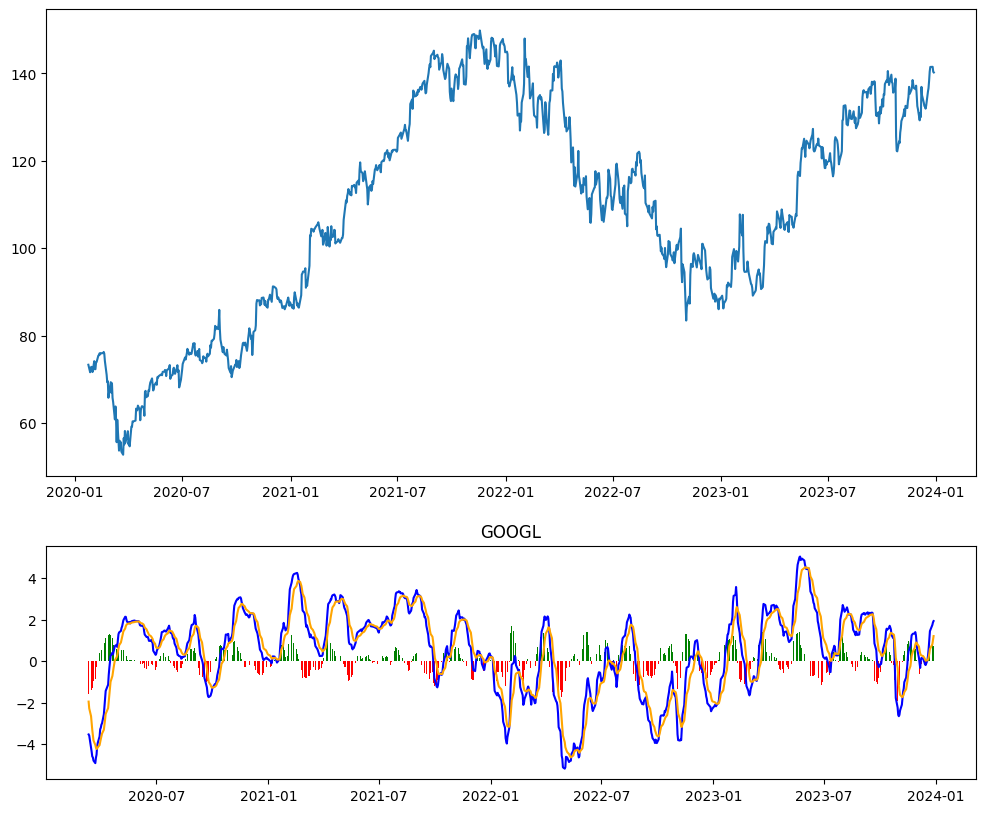

<Figure size 1400x1000 with 0 Axes>

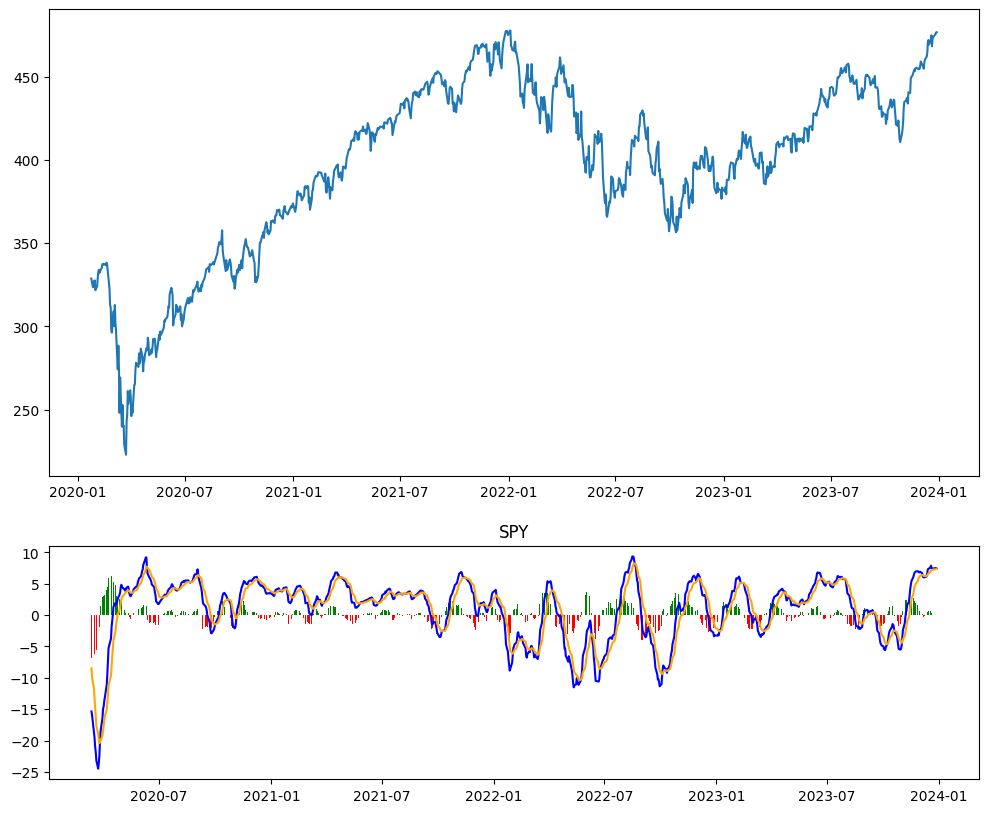

<Figure size 1400x1000 with 0 Axes>

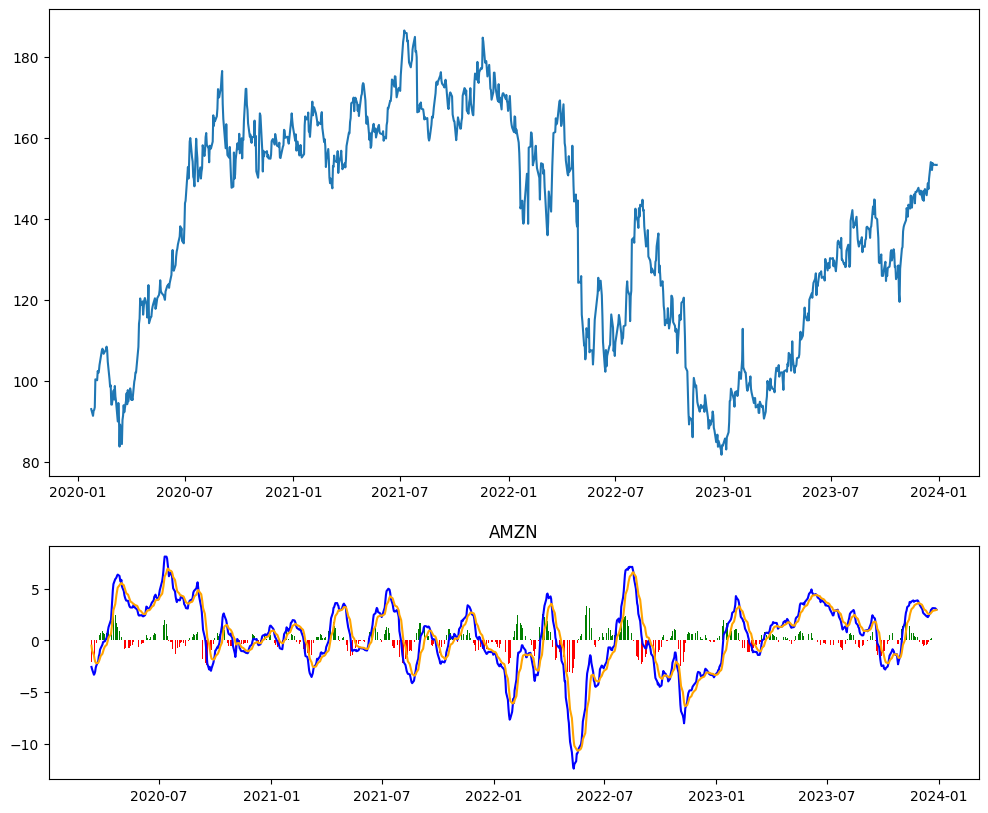

<Figure size 1400x1000 with 0 Axes>

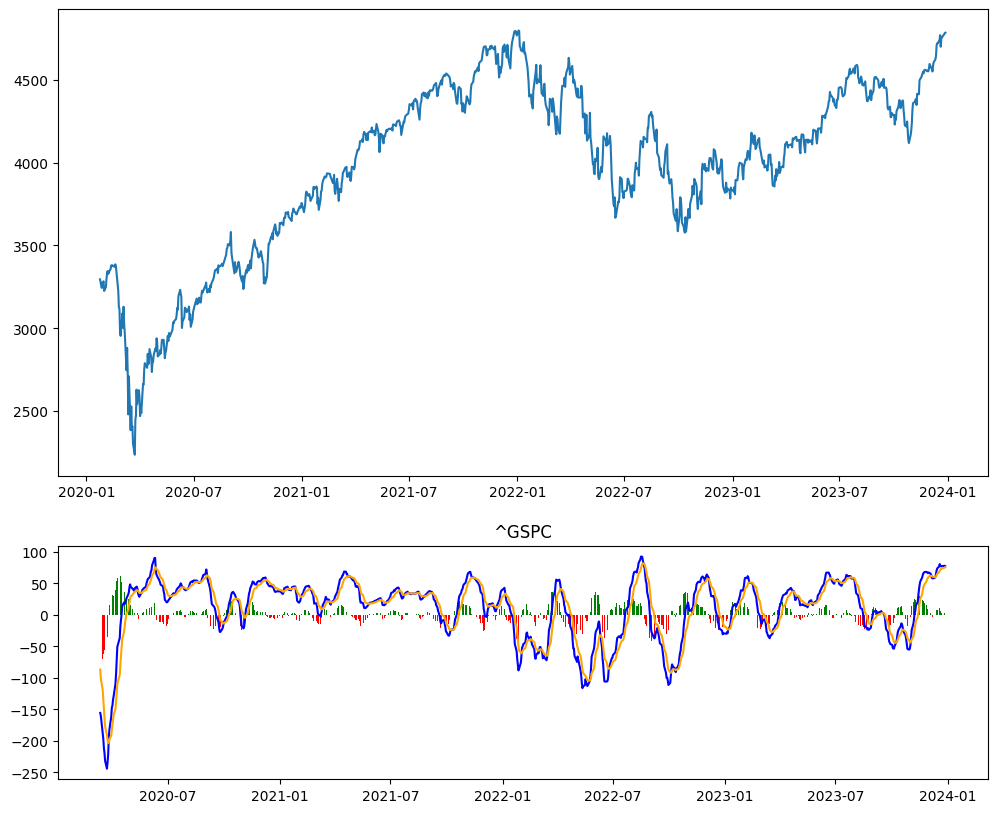

<Figure size 1400x1000 with 0 Axes>

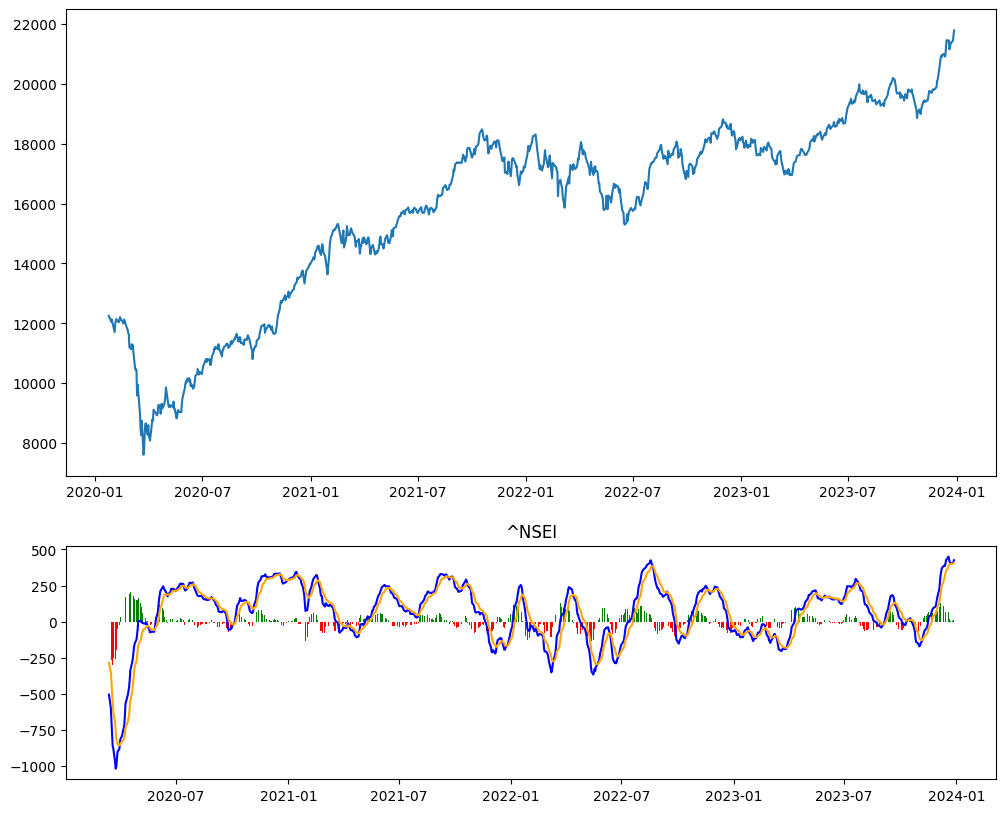

<Figure size 1400x1000 with 0 Axes>

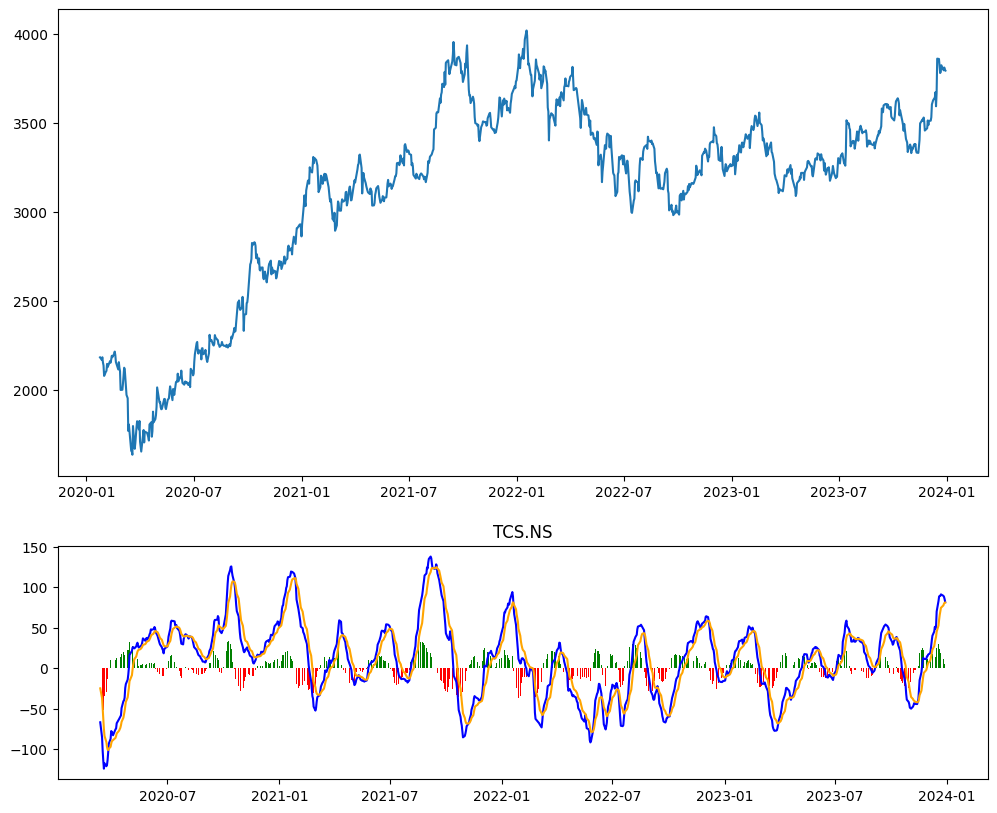

In [22]:


for stk, stk_symbol in zip(stock_dta, stocks_array) :
    macd, macd_signal, macd_hist = ta.MACD(stk["Close"])
    # Create subplots with custom height ratios
    plt.figure().set_size_inches(14, 10)

    fig, axs = plt.subplots(2, 1, gridspec_kw={'height_ratios': [2, 1]}, figsize=(12, 10))
    c = ["red" if cl <0 else "green" for cl in macd_hist]
    axs[0].plot(stk["Close"])

    # Convert dates to numerical values (you may need to parse actual date strings into datetime objects)
    #numeric_dates = range(len(stk.index))
    #dates = stock_data.index

    # Annotate the closing prices on the plot
    #for i, price in enumerate(stk["Close"]):
    #    plt.plot.text(numeric_dates[i], price, f'{price}', ha='center', va='bottom', color='green')
    axs[1].plot(macd, "blue")
    axs[1].plot(macd_signal, "orange")
    axs[1].bar(macd_hist.index, macd_hist, color = c)

    plt.title(stk_symbol)



import yfinance as yf

# Define the stock symbol
symbol = "AAPL"

# Fetch historical stock data
stock_data = yf.download(symbol, start="2022-01-01", end="2023-01-01")

# Assume a risk-free rate (for example, the yield on a 10-year Treasury bond)
risk_free_rate = 0.02  # 2%

# Assume a market risk premium
market_risk_premium = 0.05  # 5%

# Calculate the cost of equity using the Capital Asset Pricing Model (CAPM)
beta = yf.Ticker(symbol).info['beta']
equity_cost = risk_free_rate + beta * market_risk_premium

# Assume a cost of debt (you might get this from financial statements or other sources)
cost_of_debt = 0.035  # 3.5%

# Assume the market value of equity and debt
market_value_equity = stock_data['Adj Close'][-1] * stock_data['Shares Outstanding'][-1]
market_value_debt = 1000000  # Placeholder value for debt (replace with actual value)

# Calculate the weights of equity and debt in the capital structure
equity_weight = market_value_equity / (market_value_equity + market_value_debt)
debt_weight = 1 - equity_weight

# Calculate the WACC
wacc = equity_weight * equity_cost + debt_weight * cost_of_debt

print("WACC:", round(wacc, 4))


In [24]:
#import pandas_datareader as pdr
t = ['AAPL', 'MSFT']
a = []
for str in t:
    stock = yf.Ticker(str)
    a.append(stock.info.get('sharesOutstanding'))

print (a[0])
# Define the stock symbol
symbol = "AAPL"
yf.pdr_override()

# Fetch historical stock data
stock_data = pdr.get_data_yahoo(symbol, start="2022-01-01", end="2023-01-01")

# Assume a risk-free rate (for example, the yield on a 10-year Treasury bond)
risk_free_rate = 0.02  # 2%

# Assume a market risk premium
market_risk_premium = 0.05  # 5%

# Calculate the cost of equity using the Capital Asset Pricing Model (CAPM)
# Note: You might need additional information, such as beta, for a more accurate calculation
beta = 1.2  # Placeholder value for beta
equity_cost = risk_free_rate + beta * market_risk_premium

# Assume a cost of debt (you might get this from financial statements or other sources)
cost_of_debt = 0.035  # 3.5%

# Assume the market value of equity and debt
#market_value_equity = stock_data['Adj Close'][-1] * stock_data['Shares Outstanding'][-1]
market_value_equity = stock_data['Adj Close'][-1] * a[0]
market_value_debt = 1000000  # Placeholder value for debt (replace with actual value)

# Calculate the weights of equity and debt in the capital structure
equity_weight = market_value_equity / (market_value_equity + market_value_debt)
debt_weight = 1 - equity_weight

# Calculate the WACC
wacc = equity_weight * equity_cost + debt_weight * cost_of_debt

print("WACC:", round(wacc, 4))


15552799744
[*********************100%%**********************]  1 of 1 completed
WACC: 0.08
